In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import collections

In [3]:
G1 = nx.read_edgelist('/kaggle/input/johnhopkinsdataset/socfb-JohnsHopkins55.mtx', comments='#', create_using=nx.Graph(), delimiter =' ', nodetype=int, encoding = 'utf-8')

In [4]:
degrees = [G1.degree[node] for node in G1]
N = len(G1)
L = G1.size()
kmin = np.min(degrees)
kmax = np.max(degrees)
kavg = np.mean(degrees)
print("N=", N)
print("L=", L)
print("Average degree=", kavg)
print("Min degree=", kmin)
print("Max degree=", kmax)

N= 5180
L= 186586
Average degree= 72.04092664092664
Min degree= 1
Max degree= 886


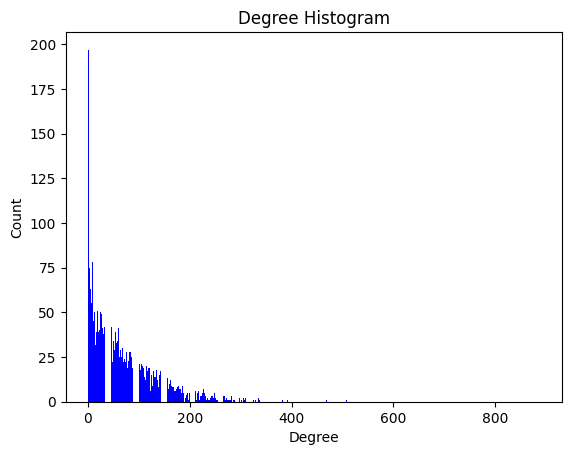

In [5]:
degree_sequence = sorted([d for n, d in G1.degree()], reverse=True) # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

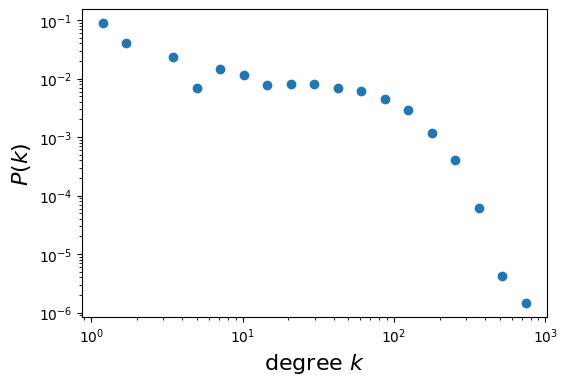

In [6]:
bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=20)
density, _ = np.histogram(degrees, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)
plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
plt.show()

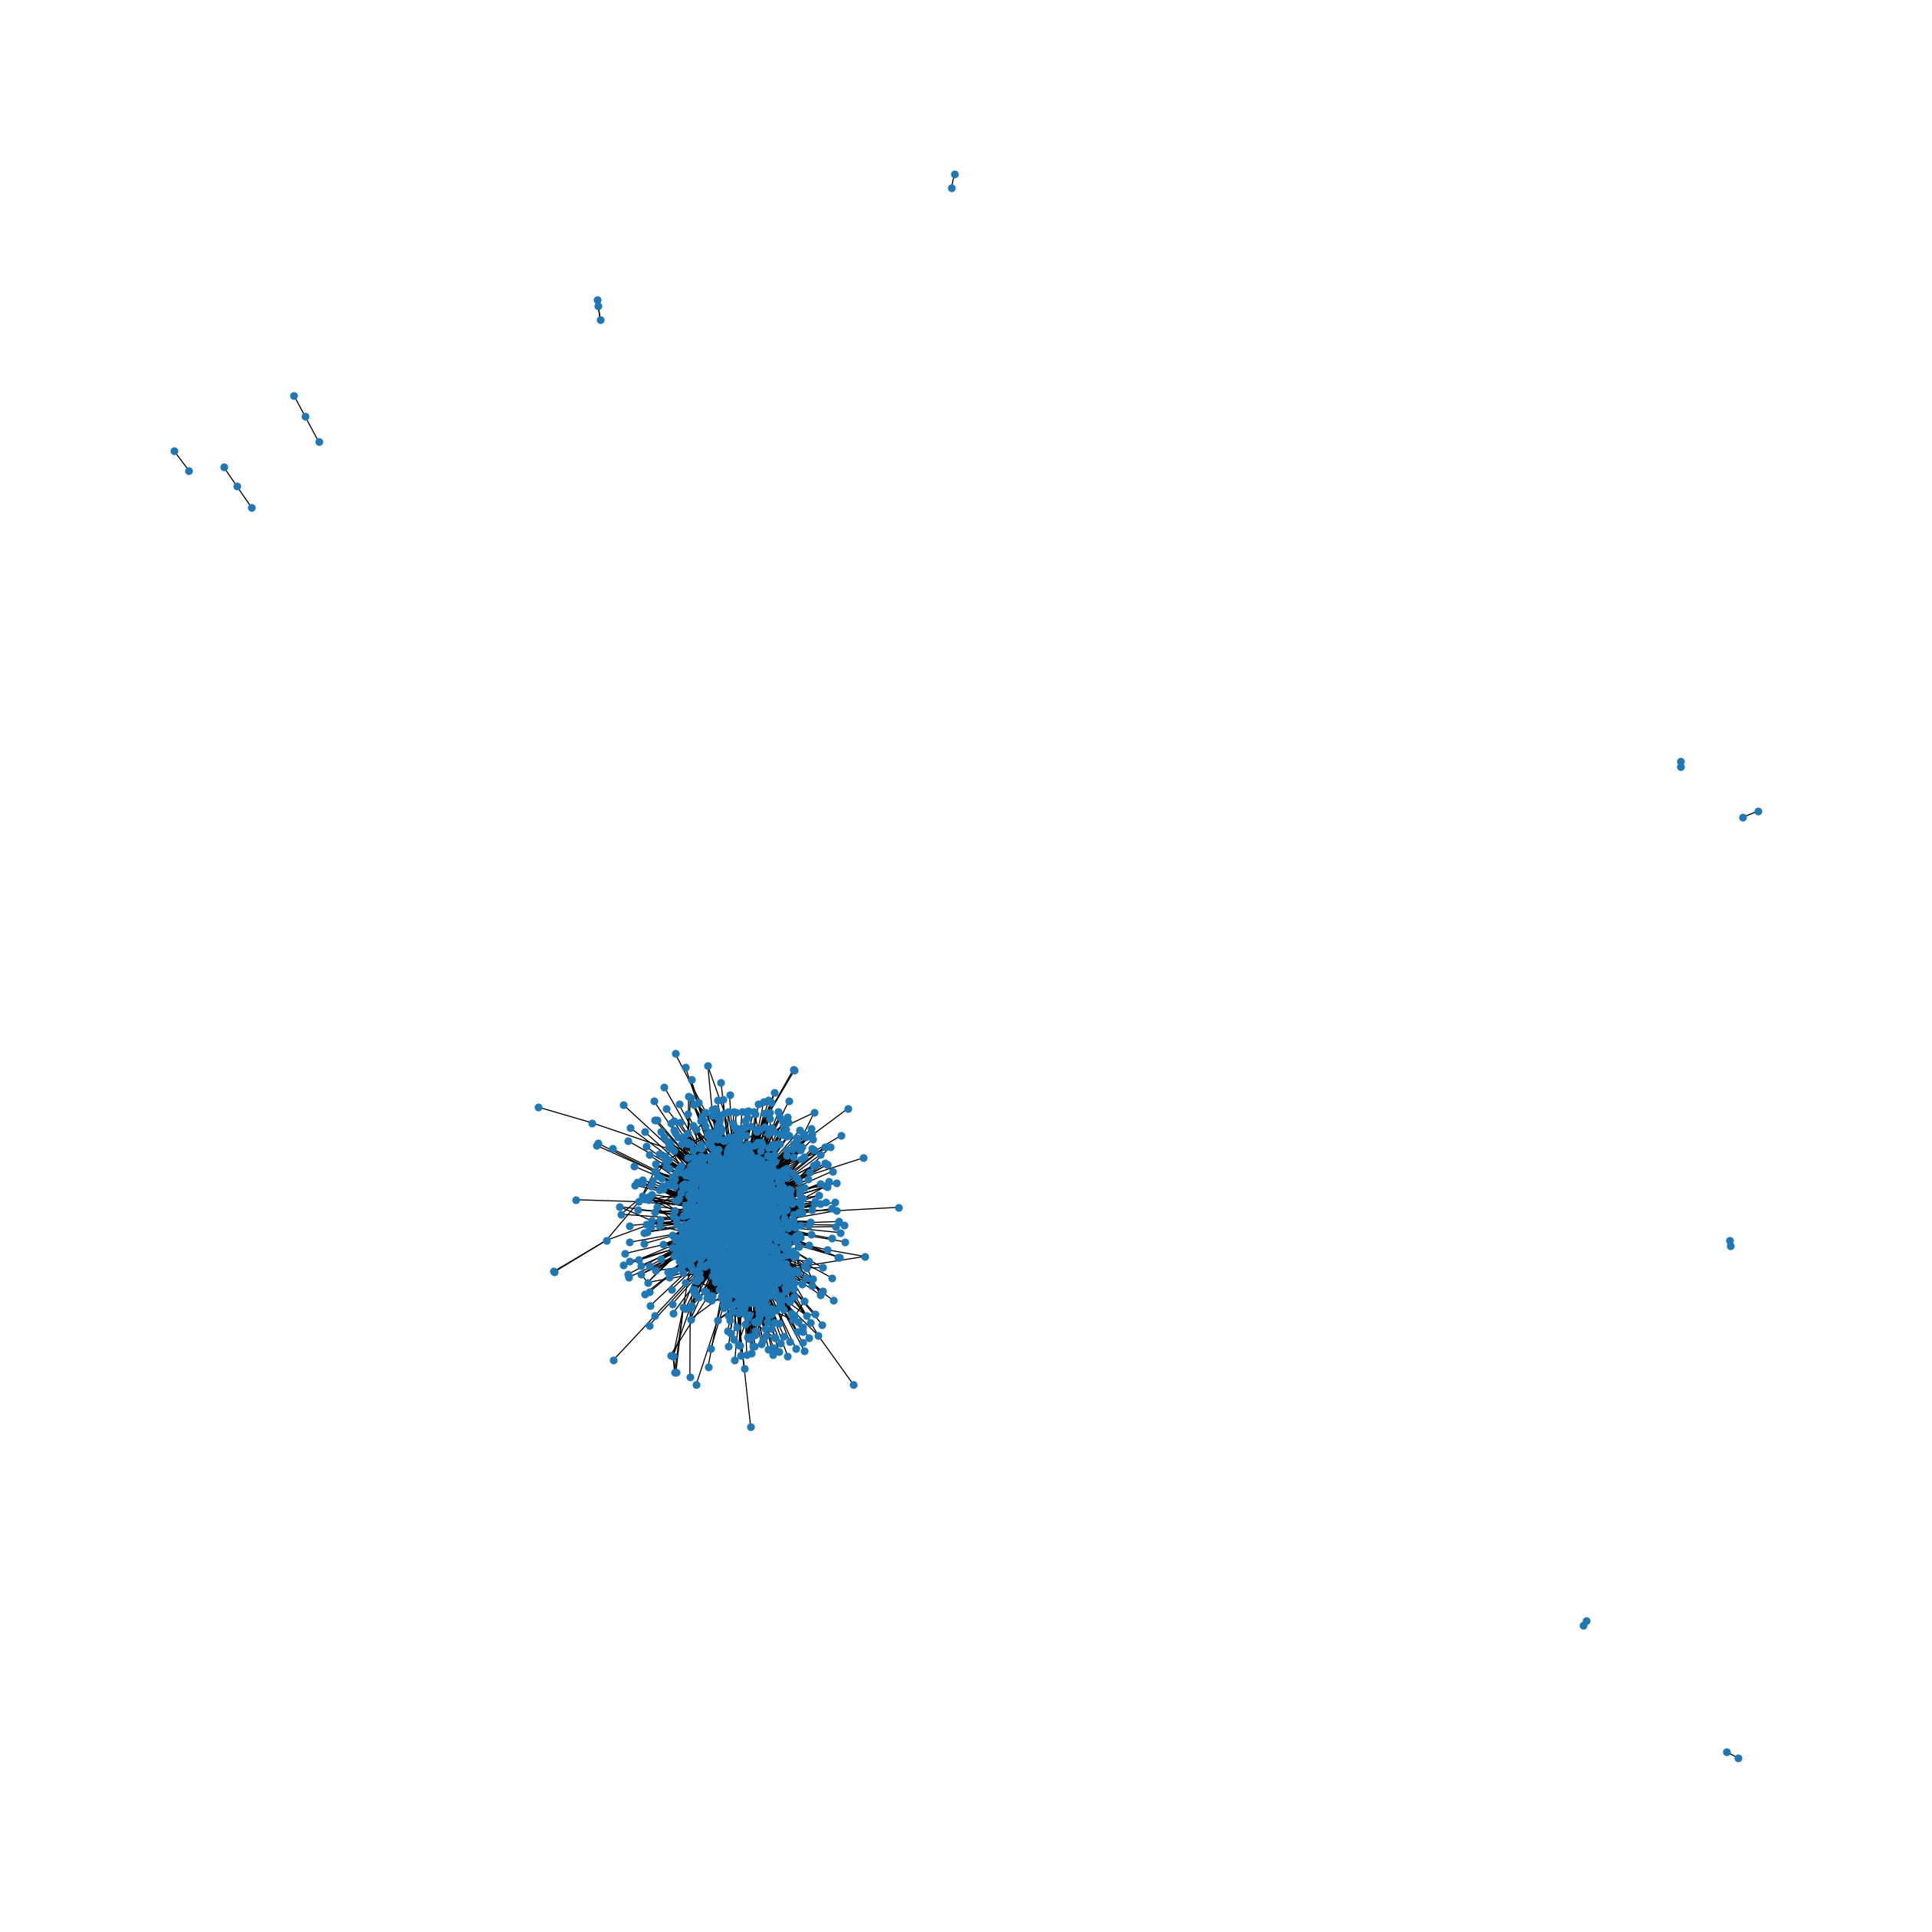

In [7]:
fig=plt.figure(figsize=(25,25))
nx.draw_spring(G1, node_size=40)

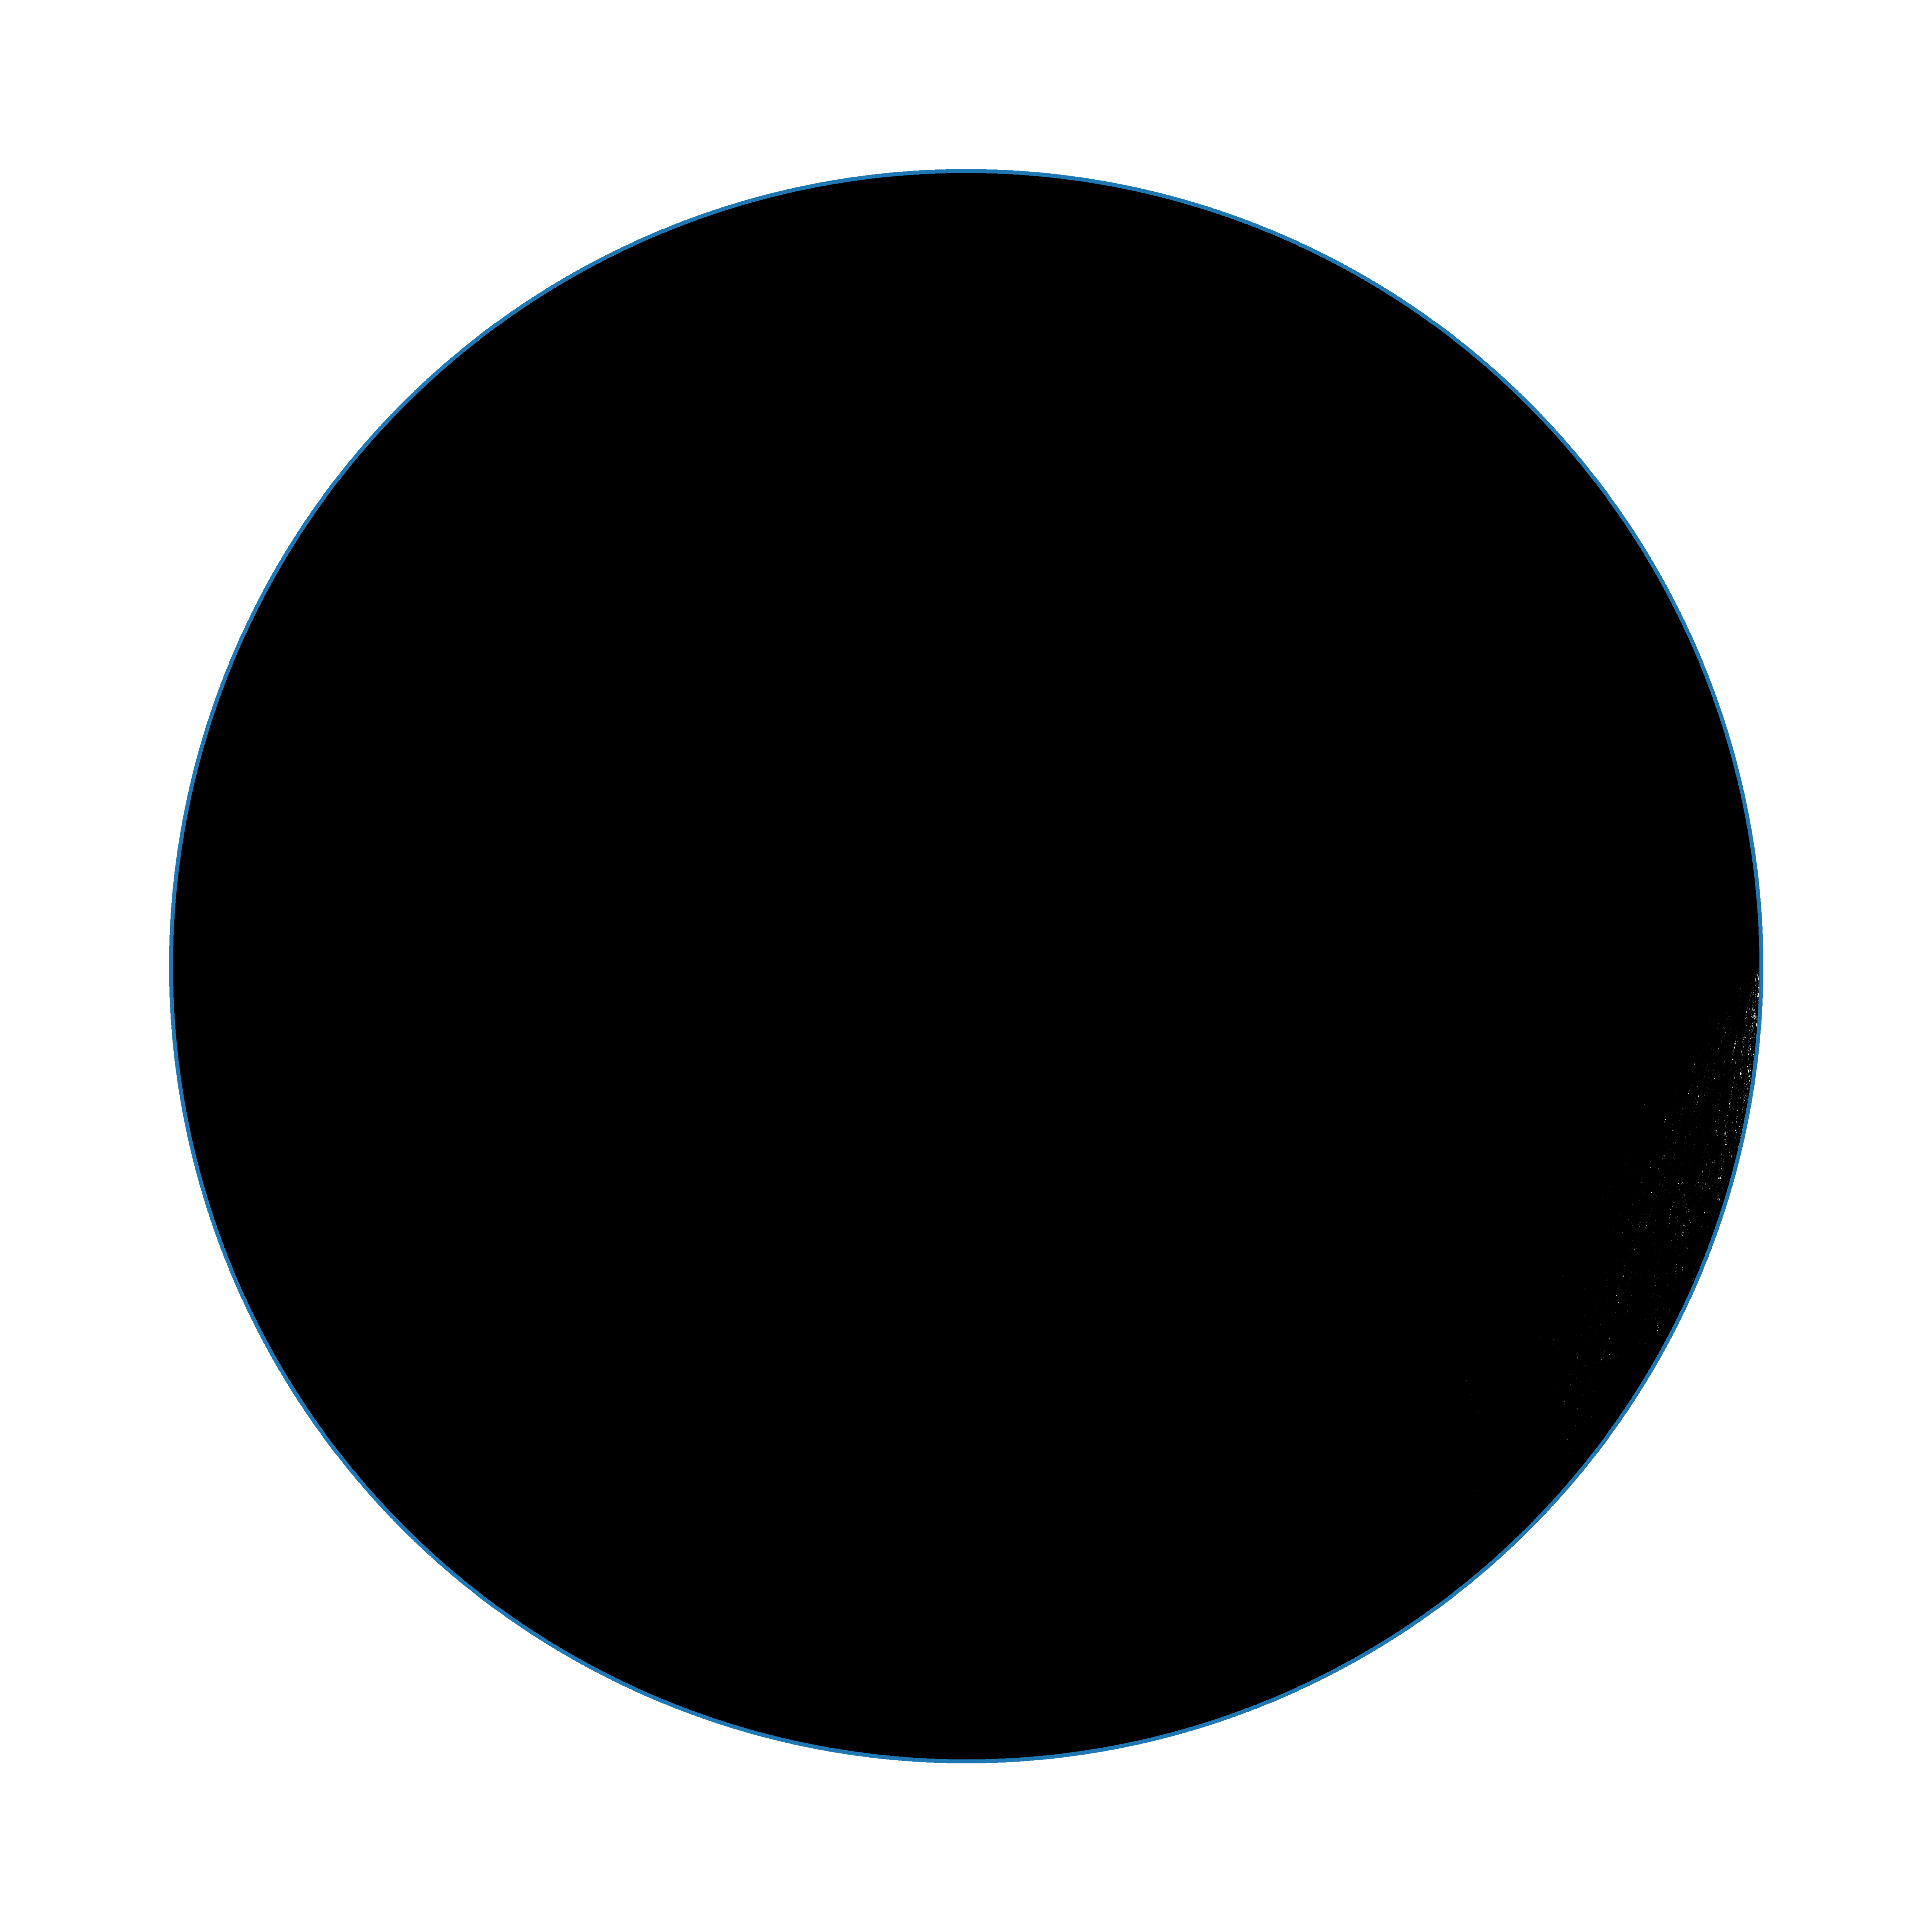

In [8]:
fig = plt.figure(figsize=(50,50))
nx.draw_circular(G1, node_size=40)

In [9]:
nx.is_connected(G1)

False